In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('Customer_Sales_Transactional_Data_CSV.csv')
df = data.copy()

In [3]:
df

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT
0,10/18/2014,34810920,205.44
1,9/22/2014,1026037818,51.36
2,9/30/2014,1095693062,222.56
3,10/25/2014,15142688,171.20
4,10/18/2014,1022245368,171.20
5,9/29/2014,3020948,85.60
6,9/26/2014,53524262,171.20
7,10/4/2014,9820168,428.00
8,10/7/2014,949544616,51.36
9,10/13/2014,1089626432,256.80


In [3]:
df.shape

(1058198, 3)

In [4]:
df.dtypes

SALES_dATE       object
CUSTOMER_ID       int64
SALES_AMOUNT    float64
dtype: object

In [5]:
df['SALES_DATE']=''
df.loc[:,{'SALES_DATE'}]=pd.to_datetime(df['SALES_dATE'])
df.drop('SALES_dATE',axis=1,inplace=True)
df.dtypes

CUSTOMER_ID              int64
SALES_AMOUNT           float64
SALES_DATE      datetime64[ns]
dtype: object

In [6]:
y=df.groupby('CUSTOMER_ID')['SALES_DATE'].agg(['min','max']).rename(columns={'min':'first date','max':'last date'})



In [9]:
y

,first date,last date
CUSTOMER_ID,,
488,2014-10-03,2014-10-03
5194,2014-10-09,2014-10-09
5398,2014-09-23,2014-10-26
6930,2014-09-25,2014-10-25
7260,2014-09-19,2014-10-24
11024,2014-09-20,2014-10-19
12360,2014-10-05,2014-10-26
12476,2014-09-18,2014-10-06
14156,2014-09-18,2014-10-21


In [7]:
z=df.groupby('CUSTOMER_ID')['SALES_AMOUNT'].agg(['min','max','sum','count','std']).rename(columns={'Total':'sum','min':'mimimum sale','max':'maximum sale','Count':'count','Std':'std'}).reset_index()


In [8]:
z

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std
0,488,171.200,171.20,171.200,1,NaN
1,5194,599.200,599.20,599.200,1,NaN
2,5398,51.360,51.36,154.080,3,0.000000
3,6930,85.600,171.20,856.000,9,28.533333
4,7260,68.480,256.80,2225.600,16,51.880474
5,11024,51.360,119.84,564.960,9,22.647631
6,12360,85.600,171.20,428.000,3,49.421183
7,12476,51.360,51.36,154.080,3,0.000000
8,14156,85.600,171.20,941.600,6,34.946054
9,15016,171.200,171.20,342.400,2,0.000000


In [9]:
ff=y.merge(z,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [10]:
ff

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,NaN
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,NaN
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000


In [11]:
df['SALES_WEEK']=pd.DatetimeIndex(df['SALES_DATE']).week

In [12]:
df['SALES_WEEK'].unique()

array([42, 39, 40, 43, 41, 38], dtype=int64)

In [13]:
df['SALES_WEEK']=abs((df['SALES_WEEK']%9)-7)


In [14]:
df.head()

,CUSTOMER_ID,SALES_AMOUNT,SALES_DATE,SALES_WEEK
0,34810920,205.44,2014-10-18,1
1,1026037818,51.36,2014-09-22,4
2,1095693062,222.56,2014-09-30,3
3,15142688,171.20,2014-10-25,0
4,1022245368,171.20,2014-10-18,1


In [15]:

wk5=df[df['SALES_WEEK']==5]
wk4=df[df['SALES_WEEK']==4]
wk3=df[df['SALES_WEEK']==3]
wk2=df[df['SALES_WEEK']==2]
wk1=df[df['SALES_WEEK']==1]
wk0=df[df['SALES_WEEK']==0]

In [16]:
df

,CUSTOMER_ID,SALES_AMOUNT,SALES_DATE,SALES_WEEK
0,34810920,205.44,2014-10-18,1
1,1026037818,51.36,2014-09-22,4
2,1095693062,222.56,2014-09-30,3
3,15142688,171.20,2014-10-25,0
4,1022245368,171.20,2014-10-18,1
5,3020948,85.60,2014-09-29,3
6,53524262,171.20,2014-09-26,4
7,9820168,428.00,2014-10-04,3
8,949544616,51.36,2014-10-07,2
9,1089626432,256.80,2014-10-13,1


# Week 0


In [17]:
g_w0=wk0.groupby(['CUSTOMER_ID'])

In [18]:
dfw0=g_w0.agg({'SALES_AMOUNT':{'Total':'sum','Maximum':'max','Minimum':'min','Count':'count','Std':'std'}}).reset_index()

C:\Users\talha\newwwwwww\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [19]:
dfw0

CUSTOMER_ID SALES_AMOUNT                                  
                          Total Maximum Minimum Count         Std
0             5398        51.36   51.36   51.36     1         NaN
1             6930       256.80   85.60   85.60     3    0.000000
2             7260       256.80  171.20   85.60     2   60.528340
3            12360       171.20  171.20  171.20     1         NaN
4            14156       171.20  171.20  171.20     1         NaN
5            19226       145.52  145.52  145.52     1         NaN
6            19920        85.60   85.60   85.60     1         NaN
7            22572       171.20  171.20  171.20     1         NaN
8            22670        85.60   85.60   85.60     1         NaN
9            23896        85.60   85.60   85.60     1         NaN
10           24930       342.40  342.40  342.40     1         NaN
11           27058       102.72  102.72  102.72     1         NaN
12           27076       291.04  171.20  119.84     2   36.317004
13           35644       102.72  102.72  102.72     1         NaN
14           36438        85.60   85.60   85.60     1         NaN
15           37290       256.80   85.60   85.60     3    0.000000
16           38110        85.60   85.60   85.60     1         NaN
17           42394        85.60   85.60   85.60     1         NaN
18           44222       239.68  239.68  239.68     1         NaN
19           46292       171.20  171.20  171.20     1         NaN
20           51060        51.36   51.36   51.36     1         NaN
21           51444       325.28  273.92   51.36     2  157.373685
22           62626        85.60   85.60   85.60     1         NaN
23           65002        51.36   51.36   51.36     1         NaN
24           65764        85.60   85.60   85.60     1         NaN
25           66232       308.16  308.16  308.16     1         NaN
26           66682        85.60   85.60   85.60     1         NaN
27           68282       342.40  171.20  171.20     2    0.000000
28           69394        51.36   51.36   51.36     1         NaN
29           69584       171.20  171.20  171.20     1         NaN
...            ...          ...     ...     ...   ...         ...
110539  1208676730       171.20  171.20  171.20     1         NaN
110540  1208799730        85.60   85.60   85.60     1         NaN
110541  1208799928       342.40  342.40  342.40     1         NaN
110542  1208800172       513.60  342.40  171.20     2  121.056681
110543  1208800396       342.40  171.20  171.20     2    0.000000
110544  1208800714       171.20  171.20  171.20     1         NaN
110545  1208801416        51.36   51.36   51.36     1         NaN
110546  1208804298        85.60   85.60   85.60     1         NaN
110547  1209127726        68.48   68.48   68.48     1         NaN
110548  1209128706        85.60   85.60   85.60     1         NaN
110549  1209129080       342.40  171.20  171.20     2    0.000000
110550  1209130802       342.40  342.40  342.40     1         NaN
110551  1209130832        51.36   51.36   51.36     1         NaN
110552  1209131312       273.92  273.92  273.92     1         NaN
110553  1209280870        51.36   51.36   51.36     1         NaN
110554  1209283420        51.36   51.36   51.36     1         NaN
110555  1209292442        51.36   51.36   51.36     1         NaN
110556  1209293226        85.60   85.60   85.60     1         NaN
110557  1209573372       171.20  171.20  171.20     1         NaN
110558  1209585982       453.68  239.68  214.00     2   18.158502
110559  1209952322       171.20  171.20  171.20     1         NaN
110560  1209953158        51.36   51.36   51.36     1         NaN
110561  1209954844       171.20  171.20  171.20     1         NaN
110562  1210275840        51.36   51.36   51.36     1         NaN
110563  1210282542       171.20  171.20  171.20     1         NaN
110564  1210430364        85.60   85.60   85.60     1         NaN
110565  1210445418        34.24   34.24   34.24     1         NaN
110566  1210450294        85.60   85.60   85.60

In [20]:
dfw0['churn']=1
dfw0.head()

CUSTOMER_ID SALES_AMOUNT                                 churn
                     Total Maximum Minimum Count       Std      
0        5398        51.36   51.36   51.36     1       NaN     1
1        6930       256.80   85.60   85.60     3   0.00000     1
2        7260       256.80  171.20   85.60     2  60.52834     1
3       12360       171.20  171.20  171.20     1       NaN     1
4       14156       171.20  171.20  171.20     1       NaN     1

In [21]:
dfw0.columns.droplevel(0)

Index(['', 'Total', 'Maximum', 'Minimum', 'Count', 'Std', ''], dtype='object')

In [22]:
dfw0.columns=['CUSTOMER_ID','w0_total','w0_maximum','w0_mimimum','w0_count','w0_std','churn']

In [23]:
dfw0.head()

,CUSTOMER_ID,w0_total,w0_maximum,w0_mimimum,w0_count,w0_std,churn
0,5398,51.36,51.36,51.36,1,NaN,1
1,6930,256.80,85.60,85.60,3,0.00000,1
2,7260,256.80,171.20,85.60,2,60.52834,1
3,12360,171.20,171.20,171.20,1,NaN,1
4,14156,171.20,171.20,171.20,1,NaN,1


# Week1

In [24]:
g_w1=wk1.groupby(['CUSTOMER_ID'])


In [25]:
dfw1=g_w1.agg({'SALES_AMOUNT':{'Total':'sum','Maximum':'max','Minimum':'min','Count':'count','Std':'std'}}).reset_index()

C:\Users\talha\newwwwwww\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [26]:
dfw1

CUSTOMER_ID SALES_AMOUNT                                    
                          Total  Maximum  Minimum Count         Std
0             6930        85.60    85.60    85.60     1         NaN
1             7260       582.08   171.20    68.48     4   51.360000
2            11024       119.84    68.48    51.36     2   12.105668
3            12360       171.20   171.20   171.20     1         NaN
4            14156       171.20   171.20   171.20     1         NaN
5            17606       171.20   171.20   171.20     1         NaN
6            19920        51.36    51.36    51.36     1         NaN
7            23896       171.20   171.20   171.20     1         NaN
8            24930       171.20   171.20   171.20     1         NaN
9            27076       248.24   162.64    85.60     2   54.475506
10           35644        51.36    51.36    51.36     1         NaN
11           36438        85.60    85.60    85.60     1         NaN
12           37290       222.56   136.96    85.60     2   36.317004
13           38110        85.60    85.60    85.60     1         NaN
14           42394       342.40   171.20    85.60     3   49.421183
15           43058      1712.00  1712.00  1712.00     1         NaN
16           44222       256.80   256.80   256.80     1         NaN
17           51060       205.44   102.72    51.36     3   29.652710
18           51444       273.92   273.92   273.92     1         NaN
19           54890       136.96    85.60    51.36     2   24.211336
20           62626        68.48    68.48    68.48     1         NaN
21           62710        85.60    85.60    85.60     1         NaN
22           63590       136.96    85.60    51.36     2   24.211336
23           65764        77.04    77.04    77.04     1         NaN
24           66232       342.40   342.40   342.40     1         NaN
25           69394        51.36    51.36    51.36     1         NaN
26           69584       342.40   171.20   171.20     2    0.000000
27           71608       428.00   428.00   428.00     1         NaN
28           73540        85.60    85.60    85.60     1         NaN
29           74734       171.20    85.60    85.60     2    0.000000
...            ...          ...      ...      ...   ...         ...
111158  1205867860        85.60    85.60    85.60     1         NaN
111159  1205872242        85.60    85.60    85.60     1         NaN
111160  1205874110       205.44   205.44   205.44     1         NaN
111161  1205877434       102.72    51.36    51.36     2    0.000000
111162  1205878632        85.60    85.60    85.60     1         NaN
111163  1206219558        68.48    68.48    68.48     1         NaN
111164  1206220058        85.60    85.60    85.60     1         NaN
111165  1206451508       684.80   171.20    85.60     5   46.885051
111166  1206451854        51.36    51.36    51.36     1         NaN
111167  1206717026       291.04   291.04   291.04     1         NaN
111168  1206737456       222.56   102.72    51.36     3   26.151232
111169  1206738132       308.16   171.20    51.36     3   61.727038
111170  1206738334       171.20   171.20   171.20     1         NaN
111171  1206738606       299.60    85.60    51.36     4   16.203818
111172  1206943046        68.48    68.48    68.48     1         NaN
111173  1206944842       248.24    85.60    77.04     3    4.942118
111174  1206947320        51.36    51.36    51.36     1         NaN
111175  1206970890       265.36   102.72    77.04     3   13.075616
111176  1206971436       102.72    51.36    51.36     2    0.000000
111177  1207004158       342.40   171.20   171.20     2    0.000000
111178  1207193548        85.60    85.60    85.60     1         NaN
111179  1207206782        51.36    51.36    51.36     1         NaN
111180  1207484778      1968.80   684.80   171.20     4  245.867281
111181  1207484840        51.36    51.36    51.36     1         NaN
111182  1208105126       171.20   171.20   171.20     1         NaN
111183  1208307568       248.24   248.24   248.24     1        

In [27]:
dfw1.columns.droplevel(0)

Index(['', 'Total', 'Maximum', 'Minimum', 'Count', 'Std'], dtype='object')

In [28]:
dfw1

CUSTOMER_ID SALES_AMOUNT                                    
                          Total  Maximum  Minimum Count         Std
0             6930        85.60    85.60    85.60     1         NaN
1             7260       582.08   171.20    68.48     4   51.360000
2            11024       119.84    68.48    51.36     2   12.105668
3            12360       171.20   171.20   171.20     1         NaN
4            14156       171.20   171.20   171.20     1         NaN
5            17606       171.20   171.20   171.20     1         NaN
6            19920        51.36    51.36    51.36     1         NaN
7            23896       171.20   171.20   171.20     1         NaN
8            24930       171.20   171.20   171.20     1         NaN
9            27076       248.24   162.64    85.60     2   54.475506
10           35644        51.36    51.36    51.36     1         NaN
11           36438        85.60    85.60    85.60     1         NaN
12           37290       222.56   136.96    85.60     2   36.317004
13           38110        85.60    85.60    85.60     1         NaN
14           42394       342.40   171.20    85.60     3   49.421183
15           43058      1712.00  1712.00  1712.00     1         NaN
16           44222       256.80   256.80   256.80     1         NaN
17           51060       205.44   102.72    51.36     3   29.652710
18           51444       273.92   273.92   273.92     1         NaN
19           54890       136.96    85.60    51.36     2   24.211336
20           62626        68.48    68.48    68.48     1         NaN
21           62710        85.60    85.60    85.60     1         NaN
22           63590       136.96    85.60    51.36     2   24.211336
23           65764        77.04    77.04    77.04     1         NaN
24           66232       342.40   342.40   342.40     1         NaN
25           69394        51.36    51.36    51.36     1         NaN
26           69584       342.40   171.20   171.20     2    0.000000
27           71608       428.00   428.00   428.00     1         NaN
28           73540        85.60    85.60    85.60     1         NaN
29           74734       171.20    85.60    85.60     2    0.000000
...            ...          ...      ...      ...   ...         ...
111158  1205867860        85.60    85.60    85.60     1         NaN
111159  1205872242        85.60    85.60    85.60     1         NaN
111160  1205874110       205.44   205.44   205.44     1         NaN
111161  1205877434       102.72    51.36    51.36     2    0.000000
111162  1205878632        85.60    85.60    85.60     1         NaN
111163  1206219558        68.48    68.48    68.48     1         NaN
111164  1206220058        85.60    85.60    85.60     1         NaN
111165  1206451508       684.80   171.20    85.60     5   46.885051
111166  1206451854        51.36    51.36    51.36     1         NaN
111167  1206717026       291.04   291.04   291.04     1         NaN
111168  1206737456       222.56   102.72    51.36     3   26.151232
111169  1206738132       308.16   171.20    51.36     3   61.727038
111170  1206738334       171.20   171.20   171.20     1         NaN
111171  1206738606       299.60    85.60    51.36     4   16.203818
111172  1206943046        68.48    68.48    68.48     1         NaN
111173  1206944842       248.24    85.60    77.04     3    4.942118
111174  1206947320        51.36    51.36    51.36     1         NaN
111175  1206970890       265.36   102.72    77.04     3   13.075616
111176  1206971436       102.72    51.36    51.36     2    0.000000
111177  1207004158       342.40   171.20   171.20     2    0.000000
111178  1207193548        85.60    85.60    85.60     1         NaN
111179  1207206782        51.36    51.36    51.36     1         NaN
111180  1207484778      1968.80   684.80   171.20     4  245.867281
111181  1207484840        51.36    51.36    51.36     1         NaN
111182  1208105126       171.20   171.20   171.20     1         NaN
111183  1208307568       248.24   248.24   248.24     1        

In [29]:
dfw1.columns=['CUSTOMER_ID','w1_total','w1_maximum','w1_mimimum','w1_count','w1_std']

In [30]:
dfw1.head()

,CUSTOMER_ID,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std
0,6930,85.60,85.60,85.60,1,NaN
1,7260,582.08,171.20,68.48,4,51.360000
2,11024,119.84,68.48,51.36,2,12.105668
3,12360,171.20,171.20,171.20,1,NaN
4,14156,171.20,171.20,171.20,1,NaN


# Week2

In [31]:
g_w2=wk2.groupby(['CUSTOMER_ID'])

In [32]:
dfw2=g_w2.agg({'SALES_AMOUNT':{'Total':'sum','Maximum':'max','Minimum':'min','Count':'count','Std':'std'}}).reset_index()

C:\Users\talha\newwwwwww\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [33]:
dfw2.head()

CUSTOMER_ID SALES_AMOUNT                                 
                     Total Maximum Minimum Count        Std
0        5194       599.20  599.20  599.20     1        NaN
1        5398        51.36   51.36   51.36     1        NaN
2        6930       256.80  171.20   85.60     2  60.528340
3        7260       445.12  171.20  136.96     3  19.768473
4       11024        51.36   51.36   51.36     1        NaN

In [34]:
dfw2.columns.droplevel(0)

Index(['', 'Total', 'Maximum', 'Minimum', 'Count', 'Std'], dtype='object')

In [35]:
dfw2.columns=['CUSTOMER_ID','w2_total','w2_maximum','w2_mimimum','w2_count','w2_std']

In [36]:
dfw2

,CUSTOMER_ID,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std
0,5194,599.20,599.20,599.20,1,NaN
1,5398,51.36,51.36,51.36,1,NaN
2,6930,256.80,171.20,85.60,2,60.528340
3,7260,445.12,171.20,136.96,3,19.768473
4,11024,51.36,51.36,51.36,1,NaN
5,12476,51.36,51.36,51.36,1,NaN
6,14156,171.20,171.20,171.20,1,NaN
7,15016,171.20,171.20,171.20,1,NaN
8,19226,171.20,171.20,171.20,1,NaN
9,19452,85.60,85.60,85.60,1,NaN


# Week3

In [37]:
g_w3=wk3.groupby(['CUSTOMER_ID'])

In [38]:
dfw3=g_w3.agg({'SALES_AMOUNT':{'Total':'sum','Maximum':'max','Minimum':'min','Count':'count','Std':'std'}}).reset_index()

C:\Users\talha\newwwwwww\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [39]:
dfw3.head()

CUSTOMER_ID SALES_AMOUNT                            
                     Total Maximum Minimum Count   Std
0         488       171.20  171.20  171.20     1   NaN
1        6930        85.60   85.60   85.60     1   NaN
2        7260       513.60  256.80   85.60     4  85.6
3       11024       154.08   51.36   51.36     3   0.0
4       12360        85.60   85.60   85.60     1   NaN

In [40]:
dfw3.columns.droplevel(0)

Index(['', 'Total', 'Maximum', 'Minimum', 'Count', 'Std'], dtype='object')

In [41]:
dfw3.columns=['CUSTOMER_ID','w3_total','w3_maximum','w3_mimimum','w3_count','w3_std']

In [42]:
dfw3.head()

,CUSTOMER_ID,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std
0,488,171.20,171.20,171.20,1,NaN
1,6930,85.60,85.60,85.60,1,NaN
2,7260,513.60,256.80,85.60,4,85.6
3,11024,154.08,51.36,51.36,3,0.0
4,12360,85.60,85.60,85.60,1,NaN


# week4

In [43]:
g_w4=wk4.groupby(['CUSTOMER_ID'])

In [44]:
dfw4=g_w4.agg({'SALES_AMOUNT':{'Total':'sum','Maximum':'max','Minimum':'min','Count':'count','Std':'std'}}).reset_index()

C:\Users\talha\newwwwwww\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [45]:
dfw4.columns.droplevel(0)

Index(['', 'Total', 'Maximum', 'Minimum', 'Count', 'Std'], dtype='object')

In [46]:
dfw4.columns=['CUSTOMER_ID','w4_total','w4_maximum','w4_mimimum','w4_count','w4_std']

In [47]:
dfw4.head()

,CUSTOMER_ID,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std
0,5398,51.36,51.36,51.36,1,NaN
1,6930,171.20,85.60,85.60,2,0.000000
2,7260,256.80,171.20,85.60,2,60.528340
3,11024,171.20,119.84,51.36,2,48.422672
4,14156,171.20,171.20,171.20,1,NaN


# Week5

In [48]:
g_w5=wk5.groupby(['CUSTOMER_ID'])

In [49]:
dfw5=g_w5.agg({'SALES_AMOUNT':{'Total':'sum','Maximum':'max','Minimum':'min','Count':'count','Std':'std'}}).reset_index()

C:\Users\talha\newwwwwww\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [50]:
dfw5.head()

CUSTOMER_ID SALES_AMOUNT                          
                     Total Maximum Minimum Count Std
0        7260       171.20  171.20  171.20     1 NaN
1       11024        68.48   68.48   68.48     1 NaN
2       12476        51.36   51.36   51.36     1 NaN
3       14156       171.20  171.20  171.20     1 NaN
4       17606       171.20  171.20  171.20     1 NaN

In [51]:
dfw5.columns.droplevel(0)

Index(['', 'Total', 'Maximum', 'Minimum', 'Count', 'Std'], dtype='object')

In [52]:
dfw5.columns=['CUSTOMER_ID','w5_total','w5_maximum','w5_mimimum','w5_count','w5_std']

In [53]:
dfw5.head()

,CUSTOMER_ID,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
0,7260,171.20,171.20,171.20,1,NaN
1,11024,68.48,68.48,68.48,1,NaN
2,12476,51.36,51.36,51.36,1,NaN
3,14156,171.20,171.20,171.20,1,NaN
4,17606,171.20,171.20,171.20,1,NaN


# merge all


In [54]:
weeks1=dfw1.merge(dfw2,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [55]:
weeks1

,CUSTOMER_ID,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std
0,6930,85.60,85.60,85.60,1.0,NaN,256.80,171.20,85.60,2.0,60.528340
1,7260,582.08,171.20,68.48,4.0,51.360000,445.12,171.20,136.96,3.0,19.768473
2,11024,119.84,68.48,51.36,2.0,12.105668,51.36,51.36,51.36,1.0,NaN
3,12360,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,14156,171.20,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN
5,17606,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,19920,51.36,51.36,51.36,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,23896,171.20,171.20,171.20,1.0,NaN,171.20,85.60,85.60,2.0,0.000000
8,24930,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,27076,248.24,162.64,85.60,2.0,54.475506,684.80,171.20,85.60,5.0,46.885051


In [56]:
weeks1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148894 entries, 0 to 148893
Data columns (total 11 columns):
CUSTOMER_ID    148894 non-null int64
w1_total       111188 non-null float64
w1_maximum     111188 non-null float64
w1_mimimum     111188 non-null float64
w1_count       111188 non-null float64
w1_std         44010 non-null float64
w2_total       112735 non-null float64
w2_maximum     112735 non-null float64
w2_mimimum     112735 non-null float64
w2_count       112735 non-null float64
w2_std         44620 non-null float64
dtypes: float64(10), int64(1)
memory usage: 13.6 MB


In [57]:
weeks2=dfw3.merge(dfw4,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [58]:
weeks2

,CUSTOMER_ID,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std
0,488,171.200,171.200,171.200,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6930,85.600,85.600,85.600,1.0,NaN,171.20,85.60,85.60,2.0,0.000000
2,7260,513.600,256.800,85.600,4.0,85.600000,256.80,171.20,85.60,2.0,60.528340
3,11024,154.080,51.360,51.360,3.0,0.000000,171.20,119.84,51.36,2.0,48.422672
4,12360,85.600,85.600,85.600,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,12476,51.360,51.360,51.360,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,14156,85.600,85.600,85.600,1.0,NaN,171.20,171.20,171.20,1.0,NaN
7,19226,171.200,171.200,171.200,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,22670,51.360,51.360,51.360,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,23896,171.200,85.600,85.600,2.0,0.000000,171.20,85.60,85.60,2.0,0.000000


In [59]:
weeks3=weeks2.merge(dfw5,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [60]:
weeks3

,CUSTOMER_ID,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
0,488,171.200,171.200,171.200,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6930,85.600,85.600,85.600,1.0,NaN,171.20,85.60,85.60,2.0,0.000000,NaN,NaN,NaN,NaN,NaN
2,7260,513.600,256.800,85.600,4.0,85.600000,256.80,171.20,85.60,2.0,60.528340,171.20,171.20,171.20,1.0,NaN
3,11024,154.080,51.360,51.360,3.0,0.000000,171.20,119.84,51.36,2.0,48.422672,68.48,68.48,68.48,1.0,NaN
4,12360,85.600,85.600,85.600,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12476,51.360,51.360,51.360,1.0,NaN,NaN,NaN,NaN,NaN,NaN,51.36,51.36,51.36,1.0,NaN
6,14156,85.600,85.600,85.600,1.0,NaN,171.20,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN
7,19226,171.200,171.200,171.200,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,22670,51.360,51.360,51.360,1.0,NaN,NaN,NaN,NaN,NaN,NaN,171.20,171.20,171.20,1.0,NaN
9,23896,171.200,85.600,85.600,2.0,0.000000,171.20,85.60,85.60,2.0,0.000000,85.60,85.60,85.60,1.0,NaN


In [61]:
weeks4=weeks1.merge(weeks3,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [62]:
weeks4

,CUSTOMER_ID,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,...,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
0,6930,85.60,85.60,85.60,1.0,NaN,256.80,171.20,85.60,2.0,...,171.20,85.60,85.60,2.0,0.000000,NaN,NaN,NaN,NaN,NaN
1,7260,582.08,171.20,68.48,4.0,51.360000,445.12,171.20,136.96,3.0,...,256.80,171.20,85.60,2.0,60.528340,171.20,171.20,171.20,1.0,NaN
2,11024,119.84,68.48,51.36,2.0,12.105668,51.36,51.36,51.36,1.0,...,171.20,119.84,51.36,2.0,48.422672,68.48,68.48,68.48,1.0,NaN
3,12360,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14156,171.20,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,...,171.20,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN
5,17606,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.20,171.20,171.20,1.0,NaN
6,19920,51.36,51.36,51.36,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23896,171.20,171.20,171.20,1.0,NaN,171.20,85.60,85.60,2.0,...,171.20,85.60,85.60,2.0,0.000000,85.60,85.60,85.60,1.0,NaN
8,24930,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,...,428.00,428.00,428.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,27076,248.24,162.64,85.60,2.0,54.475506,684.80,171.20,85.60,5.0,...,325.28,162.64,77.04,3.0,47.144804,342.40,171.20,171.20,2.0,0.000000


In [63]:
fff=ff.merge(weeks4,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [64]:
fff

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,51.36,51.36,51.36,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,171.20,85.60,85.60,2.0,0.000000,NaN,NaN,NaN,NaN,NaN
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,256.80,171.20,85.60,2.0,60.528340,171.20,171.20,171.20,1.0,NaN
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,171.20,119.84,51.36,2.0,48.422672,68.48,68.48,68.48,1.0,NaN
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.36,51.36,51.36,1.0,NaN
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,171.20,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,NaN,NaN,...,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
fff

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,51.36,51.36,51.36,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,171.20,85.60,85.60,2.0,0.000000,NaN,NaN,NaN,NaN,NaN
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,256.80,171.20,85.60,2.0,60.528340,171.20,171.20,171.20,1.0,NaN
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,171.20,119.84,51.36,2.0,48.422672,68.48,68.48,68.48,1.0,NaN
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.36,51.36,51.36,1.0,NaN
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,171.20,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,NaN,NaN,...,171.20,171.20,171.20,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
ffff=fff.merge(dfw0,left_on='CUSTOMER_ID',right_on='CUSTOMER_ID',how='outer')

In [67]:
ffff

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w5_maximum,w5_mimimum,w5_count,w5_std,w0_total,w0_maximum,w0_mimimum,w0_count,w0_std,churn
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,51.36,51.36,51.36,1.0,NaN,1.0
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,NaN,NaN,NaN,NaN,256.80,85.60,85.60,3.0,0.000000,1.0
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,171.20,171.20,1.0,NaN,256.80,171.20,85.60,2.0,60.528340,1.0
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,68.48,68.48,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,NaN,NaN,NaN,NaN,171.20,171.20,171.20,1.0,NaN,1.0
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,51.36,51.36,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN,1.0
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
ffff


,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w5_maximum,w5_mimimum,w5_count,w5_std,w0_total,w0_maximum,w0_mimimum,w0_count,w0_std,churn
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,51.36,51.36,51.36,1.0,NaN,1.0
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,NaN,NaN,NaN,NaN,256.80,85.60,85.60,3.0,0.000000,1.0
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,171.20,171.20,1.0,NaN,256.80,171.20,85.60,2.0,60.528340,1.0
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,68.48,68.48,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,NaN,NaN,NaN,NaN,171.20,171.20,171.20,1.0,NaN,1.0
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,NaN,NaN,...,51.36,51.36,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,171.20,171.20,1.0,NaN,171.20,171.20,171.20,1.0,NaN,1.0
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
from datetime import datetime
d0 = datetime(2014,10,19)

In [70]:
ffff.loc[ffff['first date'].isnull(),'first date']=d0

In [71]:
ffff.loc[ffff['last date'].isnull(),'last date']=d0

In [72]:
ffff.isnull().sum()

CUSTOMER_ID          0
first date           0
last date            0
mimimum sale         0
maximum sale         0
sum                  0
count                0
std              42145
w1_total         88812
w1_maximum       88812
w1_mimimum       88812
w1_count         88812
w1_std          155990
w2_total         87265
w2_maximum       87265
w2_mimimum       87265
w2_count         87265
w2_std          155380
w3_total         79858
w3_maximum       79858
w3_mimimum       79858
w3_count         79858
w3_std          148376
w4_total         89495
w4_maximum       89495
w4_mimimum       89495
w4_count         89495
w4_std          156839
w5_total        108301
w5_maximum      108301
w5_mimimum      108301
w5_count        108301
w5_std          173180
w0_total         89431
w0_maximum       89431
w0_mimimum       89431
w0_count         89431
w0_std          156644
churn            89431
dtype: int64

In [73]:
ffff.fillna(0, inplace=True)

In [74]:
ffff.isnull().sum()

CUSTOMER_ID     0
first date      0
last date       0
mimimum sale    0
maximum sale    0
sum             0
count           0
std             0
w1_total        0
w1_maximum      0
w1_mimimum      0
w1_count        0
w1_std          0
w2_total        0
w2_maximum      0
w2_mimimum      0
w2_count        0
w2_std          0
w3_total        0
w3_maximum      0
w3_mimimum      0
w3_count        0
w3_std          0
w4_total        0
w4_maximum      0
w4_mimimum      0
w4_count        0
w4_std          0
w5_total        0
w5_maximum      0
w5_mimimum      0
w5_count        0
w5_std          0
w0_total        0
w0_maximum      0
w0_mimimum      0
w0_count        0
w0_std          0
churn           0
dtype: int64

In [75]:
f5=ffff.drop(['w0_total','w0_maximum','w0_mimimum','w0_count','w0_std'], axis=1)


In [76]:
f5

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,churn
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,0.00,0.00,...,51.36,51.36,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,85.60,85.60,2.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,171.20,85.60,2.0,60.528340,171.20,171.20,171.20,1.0,0.000000,1.0
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,119.84,51.36,2.0,48.422672,68.48,68.48,68.48,1.0,0.000000,0.0
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,0.00,0.00,...,0.00,0.00,0.0,0.000000,51.36,51.36,51.36,1.0,0.000000,0.0
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,171.20,171.20,1.0,0.000000,171.20,171.20,171.20,1.0,0.000000,1.0
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,0.00,0.00,...,171.20,171.20,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0


In [77]:
f5['FIRST_VISIT_DAY'] = 444444
f5.loc[:, ('FIRST_VISIT_DAY')] = d0 - f5['first date']
f5['LAST_VISIT_DAY'] = 444444
f5.loc[:, ('LAST_VISIT_DAY')] = d0 - f5['last date']

In [78]:
f5

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,churn,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,0.000000,0.00,0.00,...,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0,16 days,16 days
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,0.000000,0.00,0.00,...,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0,10 days,10 days
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,0.00,0.00,...,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0,26 days,-7 days
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,2.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0,24 days,-6 days
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,2.0,60.528340,171.20,171.20,171.20,1.0,0.000000,1.0,30 days,-5 days
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,2.0,48.422672,68.48,68.48,68.48,1.0,0.000000,0.0,29 days,0 days
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0,14 days,-7 days
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,0.00,0.00,...,0.0,0.000000,51.36,51.36,51.36,1.0,0.000000,0.0,31 days,13 days
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,1.0,0.000000,171.20,171.20,171.20,1.0,0.000000,1.0,31 days,-2 days
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,0.00,0.00,...,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0,22 days,8 days


In [79]:
#'''f5['FIRST_VISIT_DAY'] = f5['FIRST_VISIT_DAY'].dt.days
#f5['LAST_VISIT_DAY'] = f5['LAST_VISIT_DAY'].dt.days'''

In [80]:
f5

,CUSTOMER_ID,first date,last date,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,...,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,churn,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,2014-10-03,2014-10-03,171.200,171.20,171.200,1,0.000000,0.00,0.00,...,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0,16 days,16 days
1,5194,2014-10-09,2014-10-09,599.200,599.20,599.200,1,0.000000,0.00,0.00,...,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0,10 days,10 days
2,5398,2014-09-23,2014-10-26,51.360,51.36,154.080,3,0.000000,0.00,0.00,...,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0,26 days,-7 days
3,6930,2014-09-25,2014-10-25,85.600,171.20,856.000,9,28.533333,85.60,85.60,...,2.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0,24 days,-6 days
4,7260,2014-09-19,2014-10-24,68.480,256.80,2225.600,16,51.880474,582.08,171.20,...,2.0,60.528340,171.20,171.20,171.20,1.0,0.000000,1.0,30 days,-5 days
5,11024,2014-09-20,2014-10-19,51.360,119.84,564.960,9,22.647631,119.84,68.48,...,2.0,48.422672,68.48,68.48,68.48,1.0,0.000000,0.0,29 days,0 days
6,12360,2014-10-05,2014-10-26,85.600,171.20,428.000,3,49.421183,171.20,171.20,...,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0,14 days,-7 days
7,12476,2014-09-18,2014-10-06,51.360,51.36,154.080,3,0.000000,0.00,0.00,...,0.0,0.000000,51.36,51.36,51.36,1.0,0.000000,0.0,31 days,13 days
8,14156,2014-09-18,2014-10-21,85.600,171.20,941.600,6,34.946054,171.20,171.20,...,1.0,0.000000,171.20,171.20,171.20,1.0,0.000000,1.0,31 days,-2 days
9,15016,2014-09-27,2014-10-11,171.200,171.20,342.400,2,0.000000,0.00,0.00,...,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0,22 days,8 days


In [81]:
f5.drop(['first date','last date','FIRST_VISIT_DAY','LAST_VISIT_DAY'],axis=1,inplace=True)

In [82]:
f5

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,w1_mimimum,w1_count,...,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,churn
0,488,171.200,171.20,171.200,1,0.000000,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0
1,5194,599.200,599.20,599.200,1,0.000000,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0
2,5398,51.360,51.36,154.080,3,0.000000,0.00,0.00,0.00,0.0,...,51.36,51.36,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0
3,6930,85.600,171.20,856.000,9,28.533333,85.60,85.60,85.60,1.0,...,85.60,85.60,2.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0
4,7260,68.480,256.80,2225.600,16,51.880474,582.08,171.20,68.48,4.0,...,171.20,85.60,2.0,60.528340,171.20,171.20,171.20,1.0,0.000000,1.0
5,11024,51.360,119.84,564.960,9,22.647631,119.84,68.48,51.36,2.0,...,119.84,51.36,2.0,48.422672,68.48,68.48,68.48,1.0,0.000000,0.0
6,12360,85.600,171.20,428.000,3,49.421183,171.20,171.20,171.20,1.0,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.0,0.000000,1.0
7,12476,51.360,51.36,154.080,3,0.000000,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.000000,51.36,51.36,51.36,1.0,0.000000,0.0
8,14156,85.600,171.20,941.600,6,34.946054,171.20,171.20,171.20,1.0,...,171.20,171.20,1.0,0.000000,171.20,171.20,171.20,1.0,0.000000,1.0
9,15016,171.200,171.20,342.400,2,0.000000,0.00,0.00,0.00,0.0,...,171.20,171.20,1.0,0.000000,0.00,0.00,0.00,0.0,0.000000,0.0


# EDA

In [83]:
tmp=f5[['w1_total','w2_total','w3_total','w4_total']]

In [84]:
a=tmp.sum(axis=0).reset_index()

In [85]:
col=['week','total']
a.columns=col

In [86]:
a

,week,total
0,w1_total,2.456704e+07
1,w2_total,2.503252e+07
2,w3_total,2.856467e+07
3,w4_total,2.390794e+07


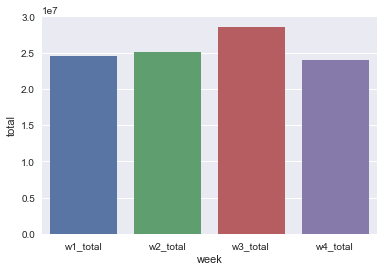

In [87]:
sns.barplot(x='week',y='total', data=a)

In [88]:
tm=f5[['w1_count','w2_count','w3_count','w4_count']]

In [89]:
b=tm.sum(axis=0).reset_index()

In [90]:
col=['week','count']
b.columns=col

In [91]:
b

,week,count
0,w1_count,181377.0
1,w2_count,184040.0
2,w3_count,205824.0
3,w4_count,179380.0


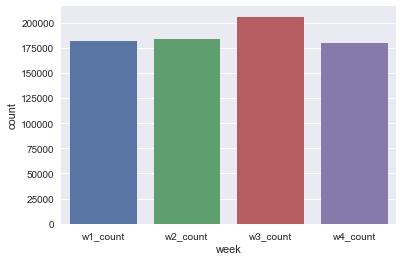

In [94]:
sns.barplot(x='week',y='count', data=b)

# how many visits

In [95]:
q=ffff.groupby('CUSTOMER_ID')['count'].sum()


In [96]:
oo=q.reset_index()

In [97]:
oooo=oo

In [98]:
oooo

,CUSTOMER_ID,count
0,488,1
1,5194,1
2,5398,3
3,6930,9
4,7260,16
5,11024,9
6,12360,3
7,12476,3
8,14156,6
9,15016,2


KeyboardInterrupt: 

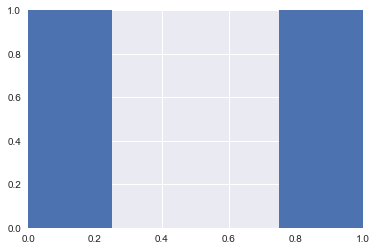

In [100]:


ax = oooo.plot.bar(x='CUSTOMER_ID')


# Frequency of Visits

In [99]:
ooooo=oooo['count'].value_counts().reset_index(name='freq')

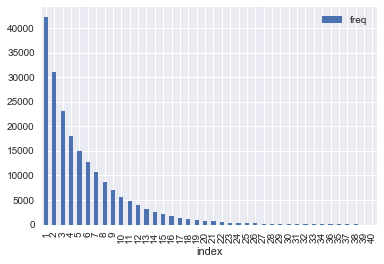

In [100]:
ax = ooooo.plot.bar(x='index')

In [101]:
ooo=oo.groupby(["count","CUSTOMER_ID"]).sum()


In [102]:
ooo.reset_index()

,count,CUSTOMER_ID
0,1,488
1,1,5194
2,1,43972
3,1,50032
4,1,64164
5,1,66682
6,1,67598
7,1,71580
8,1,84248
9,1,130606


In [ ]:
ax = oooo.plot.bar(x='count')

In [103]:
q2=fff.groupby('CUSTOMER_ID')['sum'].sum()


In [104]:
qq2=q2.reset_index()

In [105]:
qqq2=qq2.head(20)

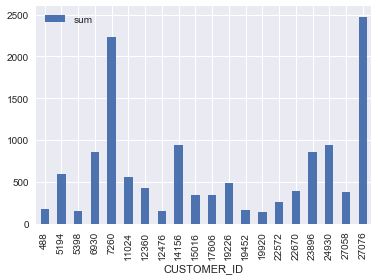

In [106]:
ax = qqq2.plot.bar(x='CUSTOMER_ID')

## WEEK 1

In [107]:
q3=fff.groupby('CUSTOMER_ID')['w1_total'].sum()


In [108]:
qq3=q3.reset_index()

In [109]:
qqq3=qq3

In [110]:
qqq3.count()

CUSTOMER_ID    200000
w1_total       200000
dtype: int64

In [111]:
df69 = qqq3[~(qqq3 == 0).any(axis=1)]



In [112]:
df69

,CUSTOMER_ID,w1_total
3,6930,85.60
4,7260,582.08
5,11024,119.84
6,12360,171.20
8,14156,171.20
10,17606,171.20
13,19920,51.36
16,23896,171.20
17,24930,171.20
19,27076,248.24


In [113]:
qqq3.dropna(df69,axis=0,inplace=True)

TypeError: dropna() got multiple values for argument 'axis'

In [114]:
df69

,CUSTOMER_ID,w1_total
3,6930,85.60
4,7260,582.08
5,11024,119.84
6,12360,171.20
8,14156,171.20
10,17606,171.20
13,19920,51.36
16,23896,171.20
17,24930,171.20
19,27076,248.24


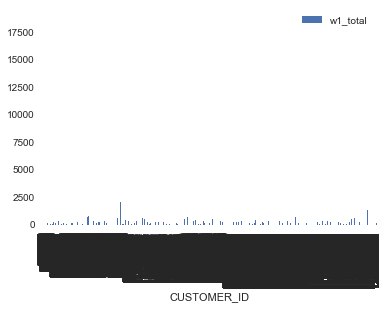

In [115]:
ax = qqq3.plot.bar(x='CUSTOMER_ID')

## week 2

In [116]:
q4=fff.groupby('CUSTOMER_ID')['w2_total'].sum()


In [117]:
qq4=q4.reset_index()

In [118]:
qqq4=qq4.head(20)

In [119]:
qqq4

,CUSTOMER_ID,w2_total
0,488,0.00
1,5194,599.20
2,5398,51.36
3,6930,256.80
4,7260,445.12
5,11024,51.36
6,12360,0.00
7,12476,51.36
8,14156,171.20
9,15016,171.20


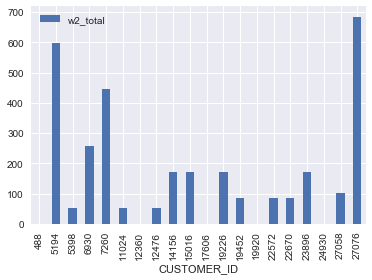

In [120]:
ax = qqq4.plot.bar(x='CUSTOMER_ID')

# Week 3

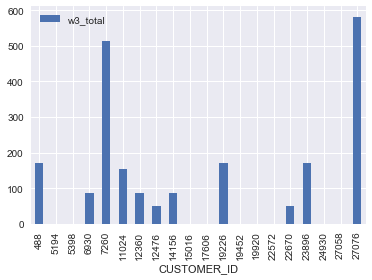

In [121]:
q5=fff.groupby('CUSTOMER_ID')['w3_total'].sum()
qq5=q5.reset_index()
qqq5=qq5.head(20)
ax = qqq5.plot.bar(x='CUSTOMER_ID')

# week 4

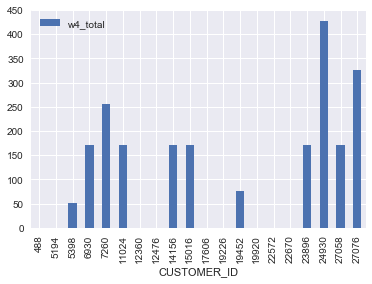

In [122]:
q6=fff.groupby('CUSTOMER_ID')['w4_total'].sum()
qq6=q6.reset_index()
qqq6=qq6.head(20)
ax = qqq6.plot.bar(x='CUSTOMER_ID')

# Week 5 

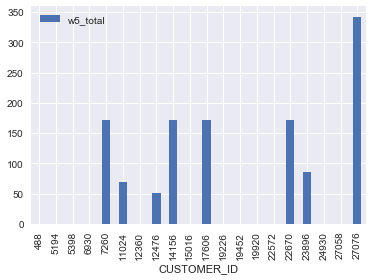

In [123]:
q7=fff.groupby('CUSTOMER_ID')['w5_total'].sum()
qq7=q7.reset_index()
qqq7=qq7.head(20)
ax = qqq7.plot.bar(x='CUSTOMER_ID')

# Log transformation

In [124]:
feat_var = f5.var()

In [125]:
tmp = pd.DataFrame({"feature":feat_var.index,"var":feat_var.values})

In [126]:
tmp=tmp.sort_values('var',ascending=False)
tmp

,feature,var
0,CUSTOMER_ID,2.339707e+17
3,sum,7.065283e+05
2,maximum sale,8.147714e+04
16,w3_total,5.493128e+04
1,mimimum sale,4.738677e+04
11,w2_total,4.714454e+04
6,w1_total,4.431875e+04
21,w4_total,3.811520e+04
17,w3_maximum,3.235890e+04
26,w5_total,3.198103e+04


In [127]:
feat_log=tmp[tmp['var']>500]['feature']
feat_log.reset_index(drop=True)

0      CUSTOMER_ID
1              sum
2     maximum sale
3         w3_total
4     mimimum sale
5         w2_total
6         w1_total
7         w4_total
8       w3_maximum
9         w5_total
10      w2_maximum
11      w3_mimimum
12      w1_maximum
13      w5_maximum
14      w1_mimimum
15      w2_mimimum
16      w5_mimimum
17      w4_maximum
18      w4_mimimum
19             std
20          w2_std
21          w3_std
22          w1_std
23          w4_std
24          w5_std
Name: feature, dtype: object

In [128]:
df_logtransf=f5.copy()

In [129]:
for i in feat_log:
    df_logtransf[i]=np.log(1+df_logtransf[i])

In [130]:
df_logtransf.var()

CUSTOMER_ID      2.550610
mimimum sale     0.369259
maximum sale     0.492694
sum              1.175869
count           23.773944
std              3.780517
w1_total         6.750304
w1_maximum       5.978541
w1_mimimum       5.563351
w1_count         1.187531
w1_std           1.758614
w2_total         6.739637
w2_maximum       5.969099
w2_mimimum       5.556893
w2_count         1.194628
w2_std           1.775726
w3_total         6.752439
w3_maximum       5.907494
w3_mimimum       5.437466
w3_count         1.356049
w3_std           2.098810
w4_total         6.716837
w4_maximum       5.954661
w4_mimimum       5.552182
w4_count         1.175456
w4_std           1.700909
w5_total         6.360171
w5_maximum       5.854975
w5_mimimum       5.574437
w5_count         0.718304
w5_std           1.075015
churn            0.247209
dtype: float64

In [131]:
pd.options.display.max_columns=100

In [132]:
df_logtransf

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,churn
0,6.192362,5.148657,5.148657,5.148657,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,8.555452,6.397263,6.397263,6.397263,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.397263,6.397263,6.397263,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,8.593969,3.958143,3.958143,5.043941,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
3,8.843759,4.461300,5.148657,6.753438,9,3.385520,4.461300,4.461300,4.461300,1.0,0.000000,5.552184,5.148657,4.461300,2.0,4.119498,4.461300,4.461300,4.461300,1.0,0.000000,5.148657,4.461300,4.461300,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
4,8.890273,4.241039,5.552184,7.708231,16,3.968034,6.368324,5.148657,4.241039,4.0,3.958143,6.100588,5.148657,4.926964,3.0,3.033436,6.243390,5.552184,4.461300,4.0,4.461300,5.552184,5.148657,4.461300,2.0,4.119498,5.148657,5.148657,5.148657,1.0,0.000000,1.0
5,9.307921,3.958143,4.794467,6.338523,9,3.163263,4.794467,4.241039,3.958143,2.0,2.573045,3.958143,3.958143,3.958143,1.0,0.000000,5.043941,3.958143,3.958143,3.0,0.000000,5.148657,4.794467,3.958143,2.0,3.900409,4.241039,4.241039,4.241039,1.0,0.000000,0.0
6,9.422302,4.461300,5.148657,6.061457,3,3.920411,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
7,9.431642,3.958143,3.958143,5.043941,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,0.0
8,9.557964,4.461300,5.148657,6.848642,6,3.582019,5.148657,5.148657,5.148657,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,1.0
9,9.616938,5.148657,5.148657,5.838896,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [133]:
df_logtransf.shape

(200000, 32)

# Logistic Regression

In [134]:
X =df_logtransf.drop('churn', axis=1)
Y = df_logtransf['churn']

In [135]:
X.head()

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
0,6.192362,5.148657,5.148657,5.148657,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,8.555452,6.397263,6.397263,6.397263,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.397263,6.397263,6.397263,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,8.593969,3.958143,3.958143,5.043941,3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,3.958143,3.958143,3.958143,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,8.843759,4.461300,5.148657,6.753438,9,3.385520,4.461300,4.461300,4.461300,1.0,0.000000,5.552184,5.148657,4.461300,2.0,4.119498,4.461300,4.461300,4.461300,1.0,0.0000,5.148657,4.461300,4.461300,2.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,8.890273,4.241039,5.552184,7.708231,16,3.968034,6.368324,5.148657,4.241039,4.0,3.958143,6.100588,5.148657,4.926964,3.0,3.033436,6.243390,5.552184,4.461300,4.0,4.4613,5.552184,5.148657,4.461300,2.0,4.119498,5.148657,5.148657,5.148657,1.0,0.0


In [136]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=0)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(140000, 31) (140000,)
(60000, 31) (60000,)


In [137]:
clf_lr = LogisticRegression()
clf_lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
lr_pred = clf_lr.predict(xtest)

In [139]:
lr_pred_prb = clf_lr.predict_proba(xtest)

In [140]:
lr_pred_prb[0:5,0:5]

array([[9.99461733e-01, 5.38267293e-04],
       [9.99456272e-01, 5.43727596e-04],
       [4.44089210e-16, 1.00000000e+00],
       [9.99177446e-01, 8.22553514e-04],
       [9.13560082e-04, 9.99086440e-01]])

In [141]:
lr_pred_prb = clf_lr.predict_proba(xtest)[:,1]

In [142]:
xtest.head()

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std
54458,18.507350,6.689510,6.700101,7.387348,2,1.953430,6.700101,6.700101,6.700101,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,6.689510,6.689510,6.689510,1.0,0.000000
118646,20.758646,4.794467,5.148657,7.306827,9,2.897016,5.148657,5.148657,5.148657,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,5.838896,5.148657,5.148657,2.0,0.0,6.243390,5.148657,5.148657,3.0,0.0,5.676891,5.148657,4.794467,2.0,3.619449
57401,18.560372,3.958143,4.641695,6.691637,12,3.041482,5.676891,4.641695,3.958143,4.0,3.283914,5.243439,4.461300,3.958143,3.0,3.033436,0.000000,0.000000,0.000000,0.0,0.0,3.958143,3.958143,3.958143,1.0,0.0,3.958143,3.958143,3.958143,1.0,0.000000
115324,20.750667,4.641695,5.148657,5.616480,2,3.900409,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.641695,4.641695,4.641695,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
71684,18.838237,3.958143,5.148657,6.020732,5,3.968924,5.148657,5.148657,5.148657,1.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.958143,3.958143,3.958143,1.0,0.000000


In [143]:
xt = xtest.copy()
xt['pred'] = lr_pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,pred,pred_probability,actual
54458,18.507350,6.689510,6.700101,7.387348,2,1.953430,6.700101,6.700101,6.700101,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.689510,6.689510,6.689510,1.0,0.000000,0.0,0.000538,0.0
118646,20.758646,4.794467,5.148657,7.306827,9,2.897016,5.148657,5.148657,5.148657,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,5.838896,5.148657,5.148657,2.0,0.000000,6.243390,5.148657,5.148657,3.0,0.000000,5.676891,5.148657,4.794467,2.0,3.619449,0.0,0.000544,0.0
57401,18.560372,3.958143,4.641695,6.691637,12,3.041482,5.676891,4.641695,3.958143,4.0,3.283914,5.243439,4.461300,3.958143,3.0,3.033436,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,1.0,1.000000,1.0
115324,20.750667,4.641695,5.148657,5.616480,2,3.900409,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.641695,4.641695,4.641695,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000823,0.0
71684,18.838237,3.958143,5.148657,6.020732,5,3.968924,5.148657,5.148657,5.148657,1.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,1.0,0.999086,1.0
13473,16.894317,3.958143,4.461300,6.338523,7,2.634870,5.148657,4.461300,4.461300,2.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,1.0,0.999654,1.0
961,14.182531,3.958143,4.461300,5.409680,3,3.033436,0.000000,0.000000,0.000000,0.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.999732,1.0
10754,16.636851,4.461300,4.461300,5.838896,4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,4.461300,4.461300,2.0,0.000000,4.461300,4.461300,4.461300,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.999511,1.0
51225,18.438282,5.148657,6.397263,7.541259,5,5.374604,6.397263,6.397263,6.397263,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.838896,5.838896,5.838896,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,6.397263,6.397263,6.397263,1.0,0.000000,1.0,0.997520,1.0
177967,20.843520,5.148657,5.148657,5.838896,2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.998196,1.0


In [144]:
tn, fp, fn, tp = confusion_matrix(xt['actual'], xt['pred']).ravel()
conf_matrix=pd.DataFrame({"pred_churn":[tp,fp],"pred_Not churn":[fn,tn]},index=["churn","Not churn"])
conf_matrix

,pred_churn,pred_Not churn
churn,32998,0
Not churn,0,27002


In [145]:
accuracy_lr = accuracy_score(ytest,lr_pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 1.0


In [146]:
precision_lr = precision_score(ytest,lr_pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 1.0


In [147]:
recall_lr = recall_score(ytest,lr_pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 1.0


In [148]:
f1_lr=f1_score(ytest,lr_pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 1.0


In [149]:
print(classification_report(ytest,lr_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     27002
        1.0       1.00      1.00      1.00     32998

avg / total       1.00      1.00      1.00     60000



In [150]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [151]:
tpr, fpr

(1.0, 0.0)

In [152]:
fpr = 1 - recall_lr
tpr, fpr

(1.0, 0.0)

In [153]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [154]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

In [155]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

1.0

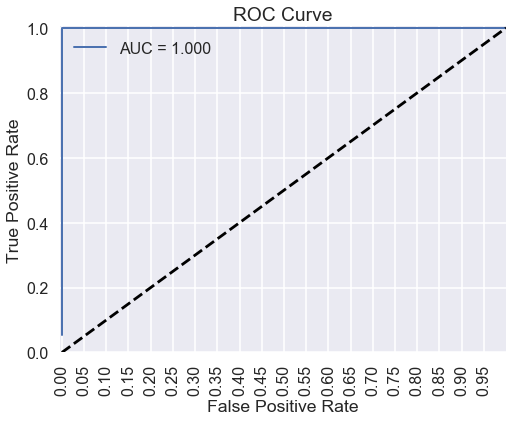

In [156]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

# KNN

In [157]:
from sklearn.preprocessing import StandardScaler 

In [158]:
scaler = StandardScaler()  
scaler.fit(xtrain)
X_train_=scaler.transform(xtrain)
X_test_=scaler.transform(xtest)
X_train=pd.DataFrame(data=X_train_, columns=xtrain.columns)
X_test=pd.DataFrame(data=X_test_, columns=xtest.columns)

In [159]:
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [160]:
clf_knn.fit(X_train,ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [161]:
knn_pred=clf_knn.predict(X_test)
knn_pred_prb=clf_knn.predict_proba(X_test)[:,1]

In [162]:
xt['knn_pred']=knn_pred
xt['knn_pred_prb']=knn_pred_prb
xt.head()

,CUSTOMER_ID,mimimum sale,maximum sale,sum,count,std,w1_total,w1_maximum,w1_mimimum,w1_count,w1_std,w2_total,w2_maximum,w2_mimimum,w2_count,w2_std,w3_total,w3_maximum,w3_mimimum,w3_count,w3_std,w4_total,w4_maximum,w4_mimimum,w4_count,w4_std,w5_total,w5_maximum,w5_mimimum,w5_count,w5_std,pred,pred_probability,actual,knn_pred,knn_pred_prb
54458,18.507350,6.689510,6.700101,7.387348,2,1.953430,6.700101,6.700101,6.700101,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,6.689510,6.689510,6.689510,1.0,0.000000,0.0,0.000538,0.0,0.0,0.0
118646,20.758646,4.794467,5.148657,7.306827,9,2.897016,5.148657,5.148657,5.148657,1.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,5.838896,5.148657,5.148657,2.0,0.0,6.243390,5.148657,5.148657,3.0,0.0,5.676891,5.148657,4.794467,2.0,3.619449,0.0,0.000544,0.0,1.0,0.8
57401,18.560372,3.958143,4.641695,6.691637,12,3.041482,5.676891,4.641695,3.958143,4.0,3.283914,5.243439,4.461300,3.958143,3.0,3.033436,0.000000,0.000000,0.000000,0.0,0.0,3.958143,3.958143,3.958143,1.0,0.0,3.958143,3.958143,3.958143,1.0,0.000000,1.0,1.000000,1.0,1.0,0.8
115324,20.750667,4.641695,5.148657,5.616480,2,3.900409,0.000000,0.000000,0.000000,0.0,0.000000,5.148657,5.148657,5.148657,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.641695,4.641695,4.641695,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000823,0.0,0.0,0.0
71684,18.838237,3.958143,5.148657,6.020732,5,3.968924,5.148657,5.148657,5.148657,1.0,0.000000,3.958143,3.958143,3.958143,1.0,0.000000,4.461300,4.461300,4.461300,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.958143,3.958143,3.958143,1.0,0.000000,1.0,0.999086,1.0,0.0,0.4


In [163]:
accuracy_knn = accuracy_score(ytest,knn_pred)
print("Accuracy : {}".format(accuracy_knn))

Accuracy : 0.8821833333333333


In [164]:
print(classification_report(ytest,knn_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.83      0.86     27002
        1.0       0.87      0.93      0.90     32998

avg / total       0.88      0.88      0.88     60000



In [165]:
fpr,tpr,threshold=roc_curve(ytest,knn_pred_prb)

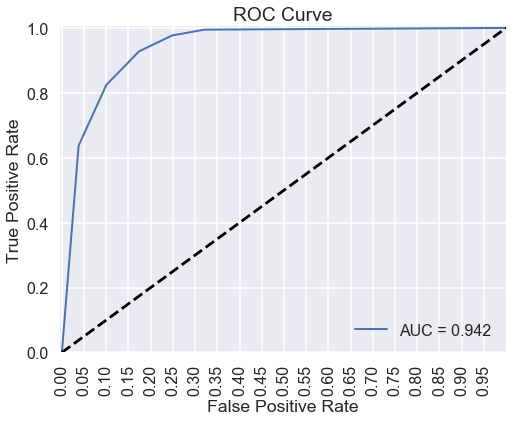

In [166]:
sns.set_context('poster')
auc_knn=roc_auc_score(ytest,knn_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_knn)

# dicision tree

In [167]:
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [168]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [169]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [170]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.7603666666666666


In [171]:
print(classification_report(ytest,dt_pred))

             precision    recall  f1-score   support

        0.0       0.71      0.79      0.75     27002
        1.0       0.81      0.73      0.77     32998

avg / total       0.77      0.76      0.76     60000



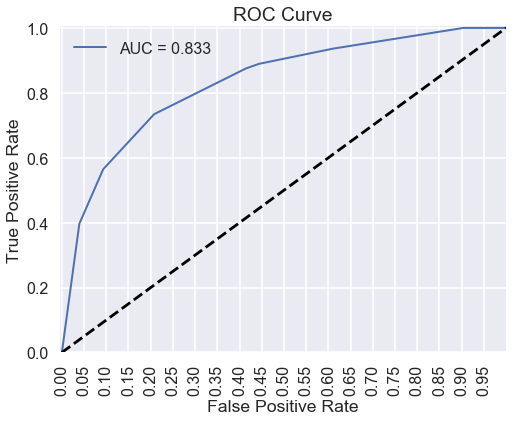

In [172]:
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [173]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [174]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [175]:
dot_data = StringIO()

In [176]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [177]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

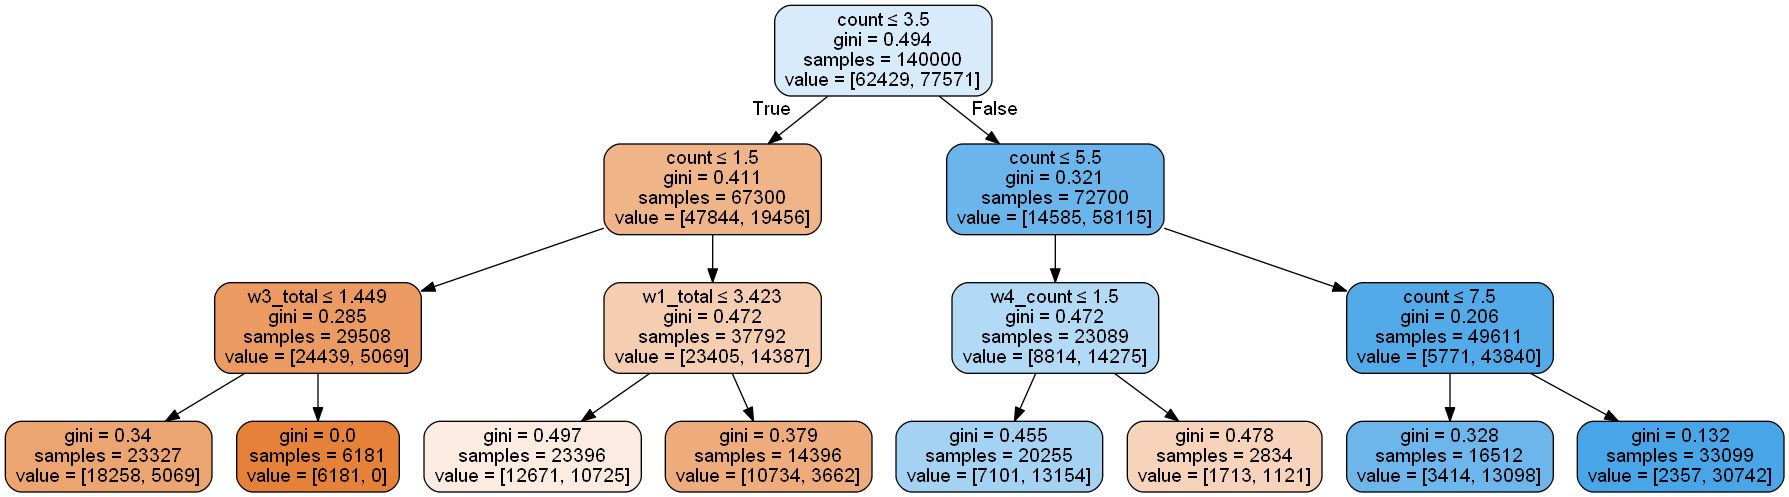

In [178]:
Image(graph.create_png())

In [179]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [180]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [181]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Decision Classifier - Features Importance')

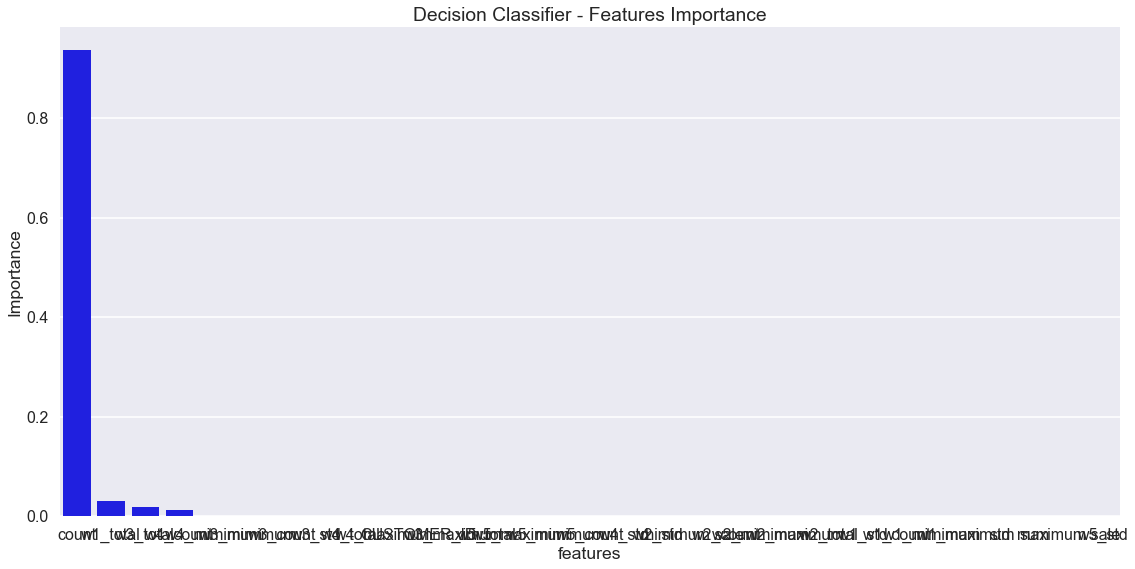

In [182]:
plt.figure(figsize=(19,9))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("features")
plt.ylabel("Importance")
plt.title("Decision Classifier - Features Importance")

# Random forest

In [183]:
from sklearn.ensemble import RandomForestClassifier


In [184]:
clf_rf = RandomForestClassifier(max_depth=4)

In [185]:
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb=clf_rf.predict_proba(xtest)[:,1]

In [187]:
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.7577


In [188]:
print(classification_report(ytest,rf_pred))

             precision    recall  f1-score   support

        0.0       0.71      0.77      0.74     27002
        1.0       0.80      0.75      0.77     32998

avg / total       0.76      0.76      0.76     60000



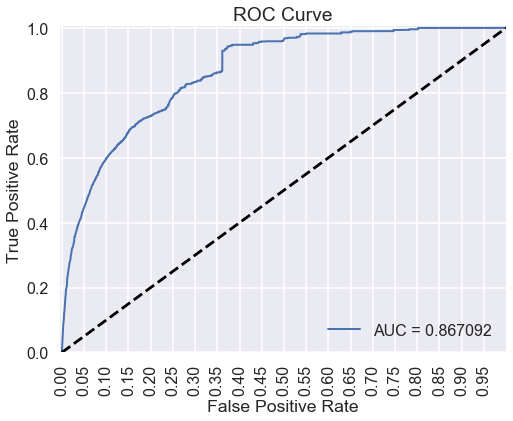

In [189]:
auc_rf=roc_auc_score(ytest,rf_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.6f'% auc_rf)

In [190]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [191]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [192]:
dot_data = StringIO()

In [193]:
tree = clf_rf.estimators_[6]

In [194]:
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [195]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

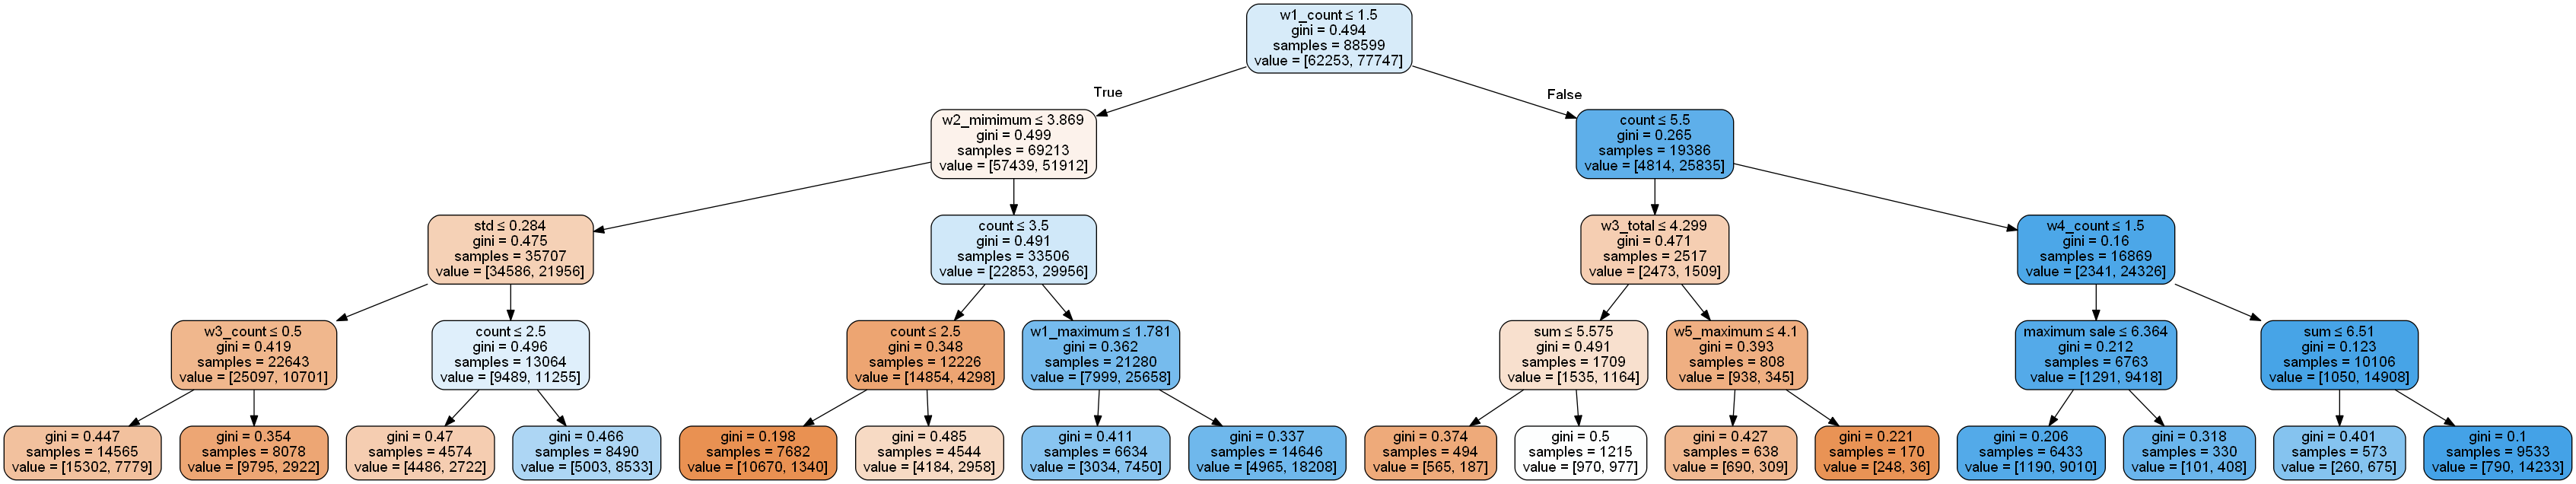

In [196]:
Image(graph.create_png())

In [197]:
features_tuple=list(zip(X.columns,clf_rf.feature_importances_))

In [198]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [199]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5,1,'Random Forest Classifier - Features Importance')

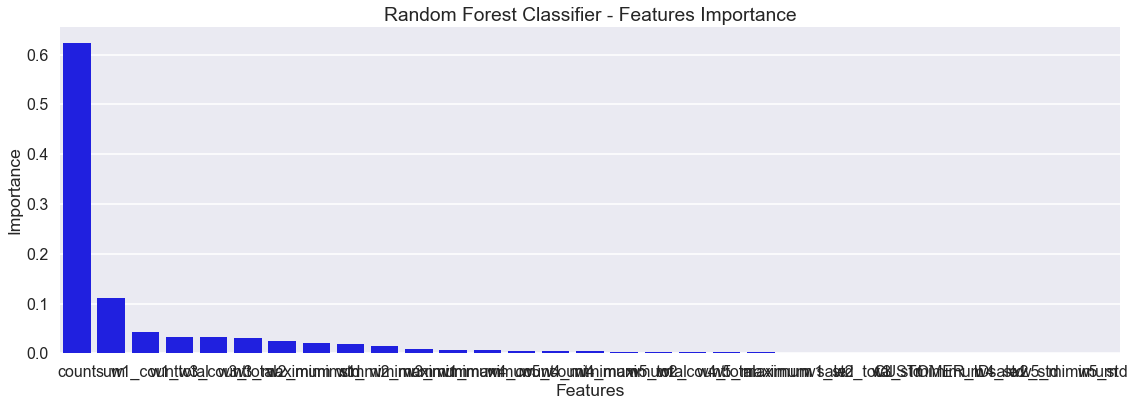

In [200]:
plt.figure(figsize=(19,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Classifier - Features Importance")

In [201]:
from sklearn.model_selection import GridSearchCV

In [213]:
param_grid1 = {"n_estimators" : [1,100,200,300,400,500],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30,35,40,45,50],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier()
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='roc_auc',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

RF_cv1.grid_scores_, RF_cv1.best_params_, RF_cv1.best_score_

KeyboardInterrupt: 

# XGBoost

In [202]:
clf_xgb = xgb.XGBClassifier(seed=60,nthread=4)

In [203]:
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=60, silent=True,
       subsample=1)

In [204]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

C:\Users\talha\newwwwwww\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [205]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.9295333333333333


In [206]:
print(classification_report(ytest,xgb_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.85      0.92     27002
        1.0       0.89      0.99      0.94     32998

avg / total       0.94      0.93      0.93     60000



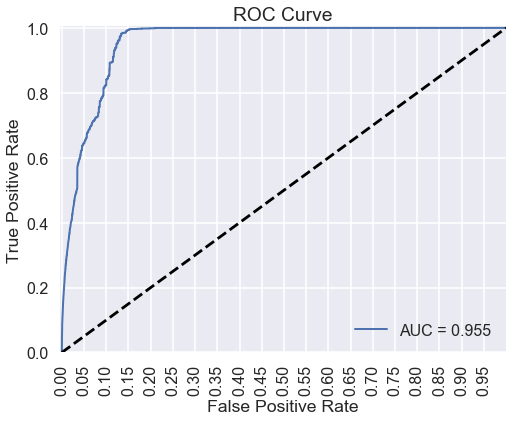

In [207]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

# cross Validation

In [208]:
dtrain = xgb.DMatrix(data=xtrain, label=ytrain)

In [209]:
xgb_param=clf_xgb.get_params()

In [210]:
cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=500,nfold=10,metrics={'auc'},early_stopping_rounds=10,seed=60)

In [211]:
cv_result

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.832658,0.001803,0.831806,0.004334
1,0.849087,0.001193,0.848742,0.003141
2,0.854554,0.002033,0.854228,0.003190
3,0.856998,0.000879,0.856677,0.003647
4,0.860128,0.002562,0.859872,0.003286
5,0.861814,0.001354,0.861482,0.003441
6,0.862722,0.001552,0.862370,0.003816
7,0.862729,0.001433,0.862424,0.004317
8,0.865403,0.002604,0.865172,0.004016
9,0.866045,0.001752,0.865788,0.003751


# XG boost hyperparameter tuning

In [212]:
def modelfit(alg, dtrain, xtrain, xtest, ytrain, ytest,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param=alg.get_params()
        cv_result=xgb.cv(xgb_param,dtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics={'auc'},
                     early_stopping_rounds=early_stopping_rounds,seed=42)
        alg.set_params(n_estimators=cv_result.shape[0])
        print("n_estimators : ",alg.get_params()['n_estimators'])
    
    #fit algorithm on data
    alg.fit(xtrain,ytrain)
    pred=alg.predict(xtest)
    predprob=alg.predict_proba(xtest)[:,1]
    
    print ("\nModel Report")
    print ("Accuracy(Test) : %.4g" % accuracy_score(ytest, pred))
    print ("AUC Score(Test) : %f" % roc_auc_score(ytest, predprob))

In [214]:
xgb1=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=60)

In [215]:
modelfit(xgb1,dtrain, xtrain, xtest,ytrain,ytest)

KeyboardInterrupt: 